<h1>Batik Nusantara image classification using VGG16</h1>
<p>Author: HendryHB</p>

<h3>VGG16</h3>
<p style="text-indent: 25px;">The Visual Geometry Group (VGG) model, specifically VGG16, is a convolutional neural network (CNN) architecture developed by the Visual Geometry Group at the University of Oxford. It was introduced in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition” by Simonyan and Zisserman in 2014. VGG16 has 16 layers and is widely used for image classification and feature extraction tasks due to its simplicity and effectiveness. [1]</p>

<strong>VGG16 Conceptual</strong><br>

<p style="text-indent: 25px;">The VGG16 model is designed to enhance the depth of convolutional neural networks, thereby improving their ability to capture intricate patterns in images. The architecture of VGG16 is characterized by its use of small 3x3 convolutional filters, which maintain the spatial resolution of images while enabling deeper network structures. This depth allows VGG16 to learn more complex features at multiple levels of abstraction.</p>

<strong>VGG16 Components</strong><br>
The key components of the VGG16 model include:
<ol>
    <li>Input Layer: Accepts images of a fixed size (224x224 pixels).</li>
    <li>Convolutional Layers: There are 13 convolutional layers using 3x3 filters, followed by ReLU (Rectified Linear Unit) activation functions.</li>
    <li>Pooling Layers: Five max-pooling layers with a 2x2 window and a stride of 2.</li>
    <li>Fully Connected Layers: Three fully connected layers, with the first two having 4096 neurons each and the third containing 1000 neurons corresponding to the number of classes in the ImageNet dataset.</li>
    <li>Output Layer: Utilizes a softmax activation function for classification tasks.</li>
</ol>

<strong>Architecture</strong><br>
<img src="https://github.com/hendryhb/kecakbali/blob/main/vgg16/1.png?raw=true">

<strong>Bibliography</strong><br>
[1]	K. Simonyan and A. Zisserman, “Very Deep Convolutional Networks for Large-Scale Image Recognition,” Apr. 10, 2015, arXiv: arXiv:1409.1556. doi: 10.48550/arXiv.1409.1556.
</p>

In [1]:
from google.colab import drive
import zipfile
import sys
import h5py
import numpy as np
import os
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.metrics import Precision, Accuracy, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import array_to_img

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score

%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)

## Load Data

In [3]:
drive.mount('/content/drive')

In [4]:
with zipfile.ZipFile("/content/drive/MyDrive/raw_batik_v2.1.zip") as zip_ref:  # for colab
  zip_ref.extractall("./")

# Constants

In [2]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
BATCH_SIZE = 32

<h1>Pure Inference Using Pre-trained VGG16</h1>
<p style="text-indent: 25px;"><strong>Inference</strong> is the process of making predictions or generating outputs based on new or unseen data by utilizing a pre-trained model as-is, without any additional training. In this case, VGG16, which has been trained on large datasets like ImageNet, is used with its pre-trained weights.</p>

## Load the pre-trained VGG16 model and higher level layers

In [4]:
model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

<h2>Create a data generator for the inference data.</h2>
<p style="text-indent: 25px;">Since the dataset is divided into <code>training and testing</code> sets, let's use the train dataset. Alternatively, feel free to combine both folders into one and rename it as desired.</p>

In [8]:
# Data generator for inference
inference_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Assuming images for inference are in a directory "train" within DATA_DIR
inference_generator = inference_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode=None,  
    batch_size=BATCH_SIZE,
    shuffle=False 
)

Found 640 images belonging to 20 classes.


# Predict on the inference data

In [9]:
predictions = model.predict(inference_generator, verbose=1)

20/20 [==============================] - 60s 3s/step


<h2>Post-processing the Output</h2>
<p><code>decode_predictions</code> translates the model's raw output into human-readable class labels and probabilities</p>

In [10]:
decoded_predictions = decode_predictions(predictions, top=1)

# Print the predictions
for i, pred in enumerate(decoded_predictions):
    print(f"Image {i + 1}: {pred}")

Image 1: [('n09229709', 'bubble', 0.53093606)]
Image 2: [('n04136333', 'sarong', 0.18524022)]
Image 3: [('n04209239', 'shower_curtain', 0.31841898)]
Image 4: [('n03998194', 'prayer_rug', 0.9861)]
Image 5: [('n04136333', 'sarong', 0.20200752)]
Image 6: [('n03938244', 'pillow', 0.1607681)]
Image 7: [('n02666196', 'abacus', 0.09026656)]
Image 8: [('n03998194', 'prayer_rug', 0.6398516)]
Image 9: [('n02730930', 'apron', 0.353032)]
Image 10: [('n03637318', 'lampshade', 0.56863046)]
Image 11: [('n04532106', 'vestment', 0.43233213)]
Image 12: [('n04532106', 'vestment', 0.23561446)]
Image 13: [('n09229709', 'bubble', 0.43676153)]
Image 14: [('n03998194', 'prayer_rug', 0.8084833)]
Image 15: [('n04532106', 'vestment', 0.7236408)]
Image 16: [('n03998194', 'prayer_rug', 0.38305876)]
Image 17: [('n03617480', 'kimono', 0.5524064)]
Image 18: [('n04325704', 'stole', 0.1977103)]
Image 19: [('n03998194', 'prayer_rug', 0.8248376)]
Image 20: [('n02730930', 'apron', 0.45353958)]
Image 21: [('n02910353', 'bu

<br><strong>Understanding the Output</strong><br>
<p style="text-indent: 25px;">The output from the <code>decode_predictions</code> function is based on the ImageNet dataset, which includes 1,000 different classes representing a wide variety of general image categories, such as everyday objects like cars, planes, bananas, basketballs, sarongs, and shower curtains. However, if using an inference pre-trained model with specific dataset like Batik Nusantara images and custom labels, <code>decode_predictions</code> will not work correctly because it relies on the ImageNet class indices and labels.</p>
<p style="text-indent: 25px;">To get meaningful predictions for specific classes like 'Bali_Barong' or 'Papua_Cendrawasih,' it is advisable to use a custom (pre-trained) model and layers trained on the Batik Nusantara dataset. This approach will enable the model to make predictions relevant to these specific classes.</p>

# Pre-trained VGG16 Model and custom model

## Load Data - If this is done, skip this step

In [3]:
drive.mount('/content/drive')

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/raw_batik_v2.1.zip") as zip_ref:  # for colab
  zip_ref.extractall("./")

## Constants - If this is done, skip this step

In [3]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
BATCH_SIZE = 32

## Data gathering using DataGenerator

In [4]:
common_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='constant',
    preprocessing_function=preprocess_input)

train_generator = common_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, "train"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=os.path.join(DATA_DIR, "test"),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb', # Set color mode to RGB
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 640 images belonging to 20 classes.
Found 160 images belonging to 20 classes.


<h2>Load VGG16 Model without top layer and Compile</h2>
<p>Please note that the modeling used here is simple, and further customization is encouraged.</p>

In [6]:
base_model = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                            include_top=False,
                                            input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<h2>Train the Model</h2>
<p>Please note that the training strategy used here is simple, and further customization is encouraged.</p>
<p><strong>Uncomment below to run training process</strong></p>

In [14]:
# EPOCHS = 25

# # Train the model
# model_1.fit(train_generator,
#                       batch_size=BATCH_SIZE, verbose=1,
#                       epochs=EPOCHS, 
#                       validation_data=test_generator)

<h2>Load Weights Data</h2> 
<p style="text-indent: 25px;">To expedite the process, the VGG16 model has already been pre-trained, allowing to simply load the pre-trained weights instead of running the training again, which saves time. <strong>Skip this step and proceed to the evaluation and prediction after training the model</strong></p>

<h2>Load VGG16 Model without top layer and Compile - If this is done, skip this step</h2>
<p>Please note that the modeling used here is simple, and further customization is encouraged.</p>

In [5]:
base_model = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                            include_top=False,
                                            input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Create the full model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Load pre-trained weights

In [ ]:
model_1.load_weights('/content/drive/MyDrive/vgg16_batik_nusantara_weights.h5')

# Evaluation

In [7]:
test_loss, test_accuracy = model_1.evaluate(test_generator)
print(f"Test loss : {test_loss:0.3} and the test accuracy: {test_accuracy:0.2%}")

5/5 [==============================] - 290s 57s/step - loss: 3.8583 - accuracy: 0.9375
Test loss : 3.86 and the test accuracy: 93.75%


# Predict the classes

In [8]:
predictions = model_1.predict(test_generator)

5/5 [==============================] - 294s 57s/step


## Get class labels and Prediction class, labels and confidences

In [9]:
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get the true class indices
true_class_indices = test_generator.classes

# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Map predicted class indices to the actual class labels
predicted_labels = [class_labels[idx] for idx in predicted_class_indices]

# Calculate the prediction confidence for each image
prediction_confidences = np.max(predictions, axis=1)

<h3>10 Lowest Predicted Images</h3> 
<p style="text-indent: 25px;">Displaying the lowest 10 predictions is more insightful than the highest predictions when using loaded pre-trained weights. However, if the model is trained from scratch, examining the highest predictions would also be valuable.</p>

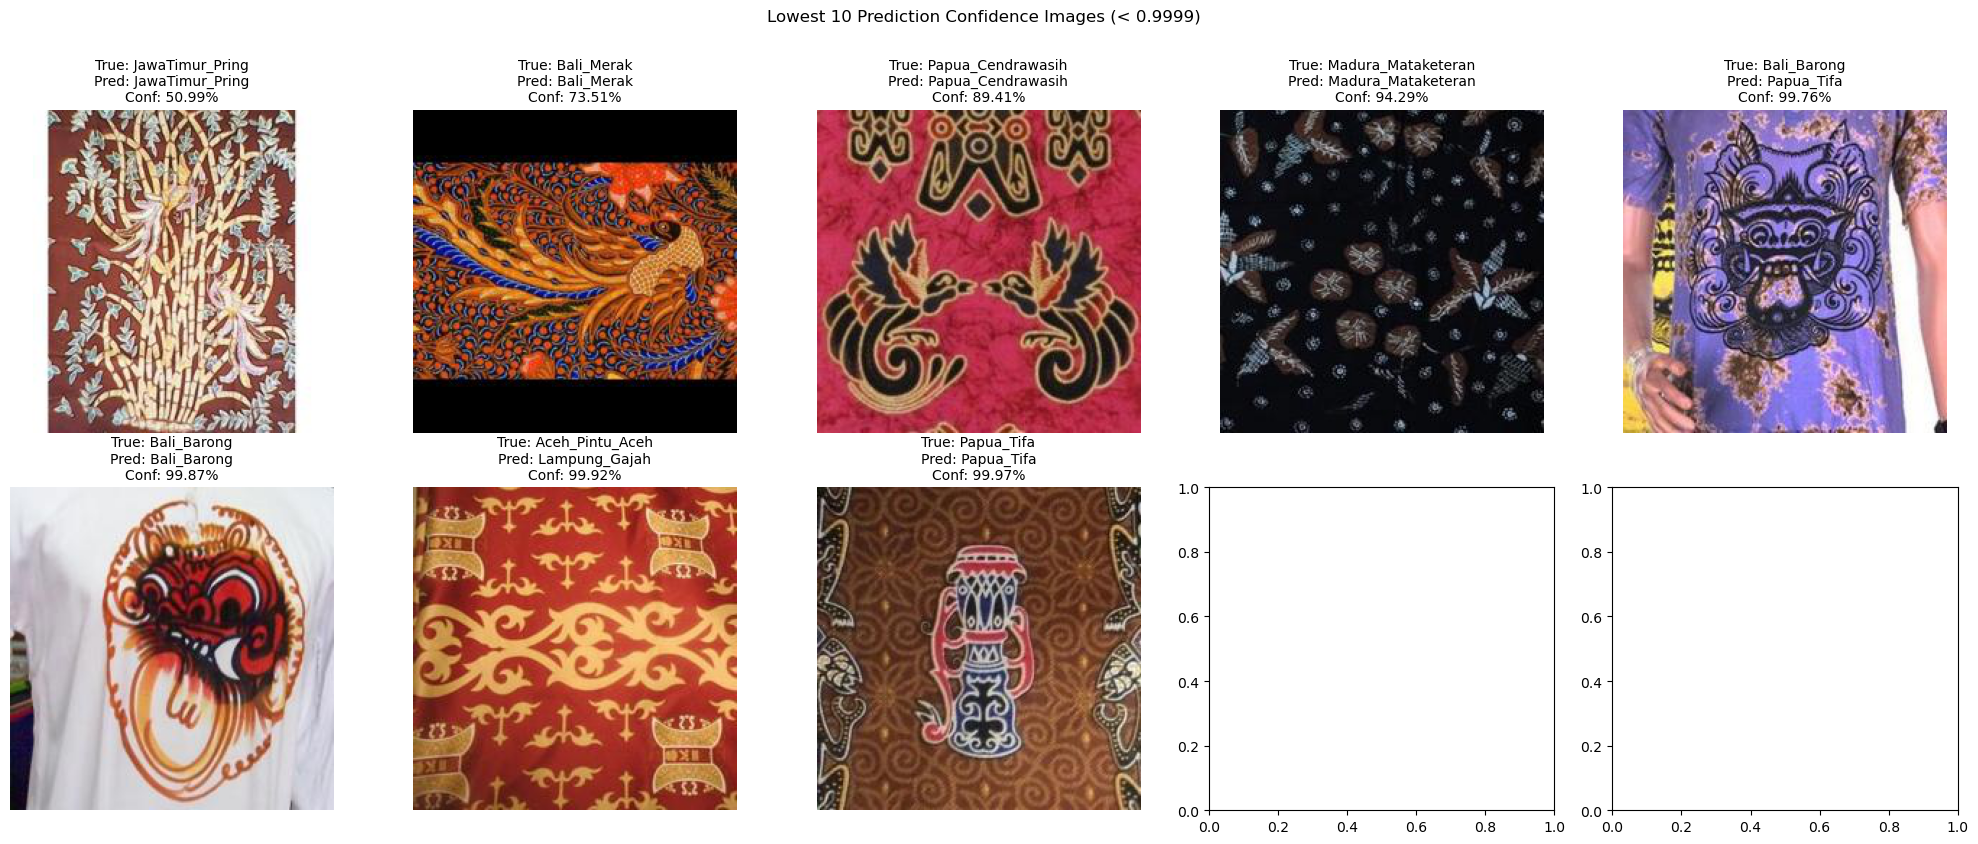

In [78]:
low_conf_indices = np.where(prediction_confidences < 0.9999)[0]
lowest_10_indices = np.argsort(prediction_confidences[low_conf_indices])[:10]

# Define the number of images to plot per row
images_per_row = 5

# Create a subplot grid to plot the images
fig, axes = plt.subplots(2, images_per_row, figsize=(20, 8))

for i, idx in enumerate(low_conf_indices[lowest_10_indices]):
    img_path = test_generator.filepaths[idx]
    true_label = class_labels[true_class_indices[idx]]
    predicted_label = predicted_labels[idx]
    confidence = prediction_confidences[idx] * 100
    
    img = plt.imread(img_path)
    ax = axes[i // images_per_row, i % images_per_row]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}%", fontsize=10)

plt.tight_layout()
plt.suptitle('Lowest 10 Prediction Confidence Images (< 0.9999)', y=1.05)
plt.show()

# Confusion Matrix and Classification Report

<h3>Calculate <code>y_true</code> and <code>y_pred</code></h3>
<p><code>y_true</code>, retrieves the true class labels of the test images, while <code>y_pred</code> determines the predicted class labels by selecting the class with the highest probability for each image.</p>

In [10]:
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

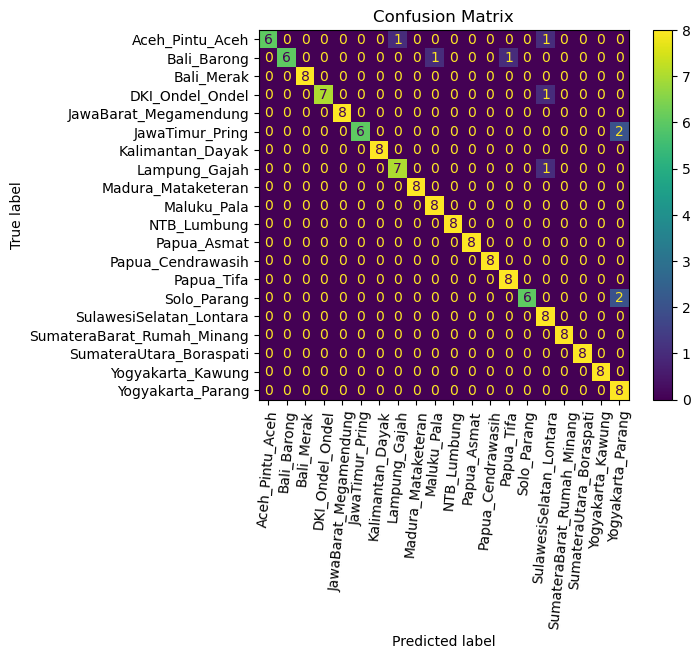

In [12]:
# Confusion Matrix Display
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.xticks(rotation=85)
plt.show()

In [90]:
class_report = classification_report(y_true, y_pred, target_names=class_labels)
print('Classification Report')
print(class_report)

Classification Report
                            precision    recall  f1-score   support

           Aceh_Pintu_Aceh       1.00      0.75      0.86         8
               Bali_Barong       1.00      0.75      0.86         8
                Bali_Merak       1.00      1.00      1.00         8
           DKI_Ondel_Ondel       1.00      0.88      0.93         8
     JawaBarat_Megamendung       1.00      1.00      1.00         8
           JawaTimur_Pring       1.00      0.75      0.86         8
          Kalimantan_Dayak       1.00      1.00      1.00         8
             Lampung_Gajah       0.88      0.88      0.88         8
        Madura_Mataketeran       1.00      1.00      1.00         8
               Maluku_Pala       0.89      1.00      0.94         8
               NTB_Lumbung       1.00      1.00      1.00         8
               Papua_Asmat       1.00      1.00      1.00         8
         Papua_Cendrawasih       1.00      1.00      1.00         8
                Papua_Tif

<h1>Summary and Conclusion</h1>
<p style="text-indent: 25px;">The test accuracy of 93.75% indicates that the model demonstrating good performance on the test data. However, the test loss of 3.86 is more significant when compared to the training loss and the losses of other models. This discrepancy suggests that the model might be overconfident, potentially due to overfitting. It's important to note that the evaluation was conducted using weights loaded from previous training (which implies the model has already been fine-tuned during its prior training sessions).</p>
<p style="text-indent: 25px;">The classification report shows balanced performance across classes, with both macro and weighted averages indicating that the model does not heavily favor or ignore any specific class. Further analysis could include cross-validation or using a more diverse test set to confirm the model's robustness. To improve the model's performance, ensure thorough training with augmented training, validation, and test datasets.</p> 
<strong>Potential Adjustments</strong><br>
<p style="text-indent: 25px;">To further improve model's performance, particularly for classes with lower confidence or recall, consider the following adjustments:
<ol>
    <li>Increase Data Augmentation: Utilize a more aggressive dataset strategy and augmentation as outlined in the data card instructions to achieve deeper and more comprehensive performance, mitigating potential overfitting and ensuring the model performs well on unseen data.</li>
    <li>Regularization: Apply dropout or other regularization techniques to prevent overfitting.</li>
    <li>Model Tuning: Experiment with model's architecture fine-tuning, hyperparameters, and training strategies.</li>
</ol>    
<p style="text-indent: 25px;">Then analyze the confusion matrix and classification report to understand model performance better. The VGG16 model is a landmark in the field of deep learning and computer vision, known for its depth and simplicity. Despite its computational demands, it remains a popular choice for image classification and feature extraction tasks due to its high performance and the availability of pre-trained weights.</p>

#### -------End of Kernel------------

<h4><em>Should you find this kernel helpful, an upvote (&#x25B2;) would be greatly appreciated.</em></h3>